<a href="https://colab.research.google.com/github/manuelncsu/Bacterial-WGS-bioinformatics-workshop/blob/main/Day_4/Bioinformatics_course_Day_4_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

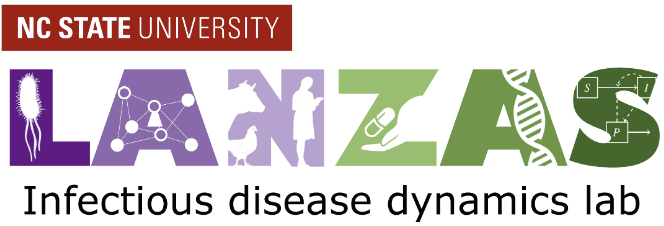

# **Bacterial WGS bioinformatics workshop**
## **Day 4 - Part 1.** Plasmid analysis

##**Step 1:** Mounting your google drive into google colab

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive/', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive/


##Lets check if it works!

In [ ]:
ls

gdrive/  sample_data/


##Lets go to the workshop main folder

In [ ]:
cd /content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_4/Part_1

/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_4/Part_1


In [ ]:
ls

condacolab_install.log


##Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...


##Verify Conda installation

In [ ]:
!conda --version

conda 23.1.0


# For this analysis we will use *Salmonella enterica* dataset

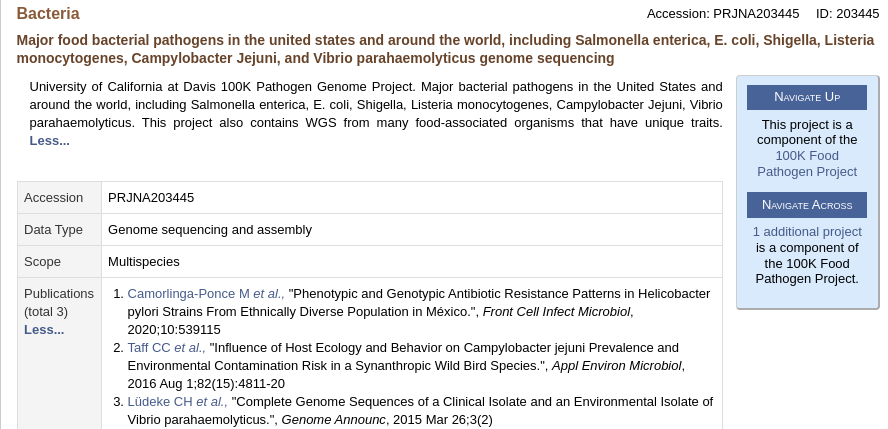

## Before running STARAMR, lets copy some previously obtained *Salmonella enterica* assembly (.fna) files generated using Bactopia, they should be in Day 4/Part_1/fna_files directory

In [ ]:
cd gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_4/Part_1/fna_files

[Errno 2] No such file or directory: 'gdrive/Shareddrives/Workshop Manuel & Alba/Day_4/Part_1/fna_files'
/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_4/Part_1/staramr


In [ ]:
!ls

bin  lib  pyvenv.cfg


## Lets create a virtual environment

In [ ]:
!python --version

Python 3.10.10


In [ ]:
!pwd

/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_4/Part_1/fna_files


In [ ]:
cd ..

/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_4/Part_1


In [ ]:
# install virtual environment package
!pip install virtualenv

In [ ]:
# create virtual environment
!virtualenv staramr

In [ ]:
# Lets check our new virtual environment
!ls

condacolab_install.log	fna_files  staramr


In [ ]:
#Activate the environment
!source staramr/bin/activate

In [ ]:
cd staramr

/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_4/Part_1/staramr


##Lets install Staramr

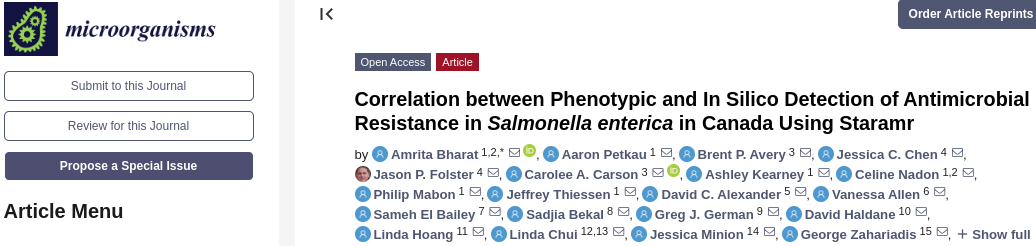

## Link to the article: https://www.mdpi.com/2076-2607/10/2/292

In [ ]:
# First install mamba
!conda install mamba -c conda-forge

In [ ]:
#Now install Staramr
!mamba install -c conda-forge -c bioconda -c defaults staramr

In [ ]:
!which staramr

/usr/local/bin/staramr


# Lets run STARAMR

In [ ]:
!staramr search --pointfinder-organism salmonella -o out /content/gdrive/Shareddrives/Workshop\ Manuel\ \&\ Alba/Day_4/Part_1/fna_files/*.fna

## Lets check the Staramr results

In [ ]:
cd staramr/out

/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_4/Part_1/staramr/out


In [ ]:
ls

detailed_summary.tsv  mlst.tsv           pointfinder.tsv  results.xlsx  summary.tsv
hits/                 plasmidfinder.tsv  resfinder.tsv    settings.txt


## **Understanding Staramr output**

## There are 8 different output files produced by staramr:

1.   **summary.tsv**: A summary of all detected AMR genes/mutations/plasmids/sequence type in each genome, one genome per line. A series of descriptive statistics is also provided for each genome as well as feedback for whether or not the genome passes several quality metrics and if not, feedback on why the genome fails.
2.   **detailed_summary.tsv**: A detailed summary of all detected AMR genes/mutations/plasmids/sequence type in each genome, one gene per line.
3.   **resfinder.tsv**: A tabular file of each AMR gene and additional BLAST information from the ResFinder database, one gene per line.
4.   **pointfinder.tsv**: A tabular file of each AMR point mutation and additional BLAST information from the PointFinder database, one gene per line.
5.   **plasmidfinder.tsv**: A tabular file of each AMR plasmid type and additional BLAST information from the PlasmidFinder database, one plasmid type per line.
6.   **mlst.tsv**: A tabular file of each multi-locus sequence type (MLST) and it's corresponding locus/alleles, one genome per line.
7.   **settings.txt**: The command-line, database versions, and other settings used to run staramr.
8.   **results.xlsx**: An Excel spreadsheet containing the previous 6 files as separate worksheets.



## Lets check the results.xlsx table

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Path to the Excel file
xlsx_path = '/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_4/Part_1/staramr/out/results.xlsx'

# Load the Excel file
xls = pd.ExcelFile(xlsx_path)

# Create a dropdown widget for selecting sheets
sheet_selector = widgets.Dropdown(options=xls.sheet_names, description='Sheet:', disabled=False)

# Function to update the output when a new sheet is selected
def update_output(selected_sheet):
    df = xls.parse(selected_sheet)
    display(df)

# Display the widget and output area
widgets.interactive(update_output, selected_sheet=sheet_selector)

interactive(children=(Dropdown(description='Sheet:', options=('Summary', 'Detailed_Summary', 'ResFinder', 'Poi…